In [5]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import os
import warnings
import sys
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [14]:
dh = pd.read_csv("cleaned_housing.csv")
dh.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597,0,0,1,0
1,1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512,0,0,1,0
2,2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843,0,0,1,0
3,3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329,0,0,1,0
4,4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616,0,0,1,0


In [17]:
def eval_metrics(actual, pred):
    # compute relevant metrics
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


def load_data(data_path):
    data = pd.read_csv(data_path)

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["median_house_value"], axis=1)
    test_x = test.drop(["median_house_value"], axis=1)
    train_y = train[["median_house_value"]]
    test_y = test[["median_house_value"]]
    return train_x, train_y, test_x, test_y

def train_LR():
    # train a model with given parameters
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    data_path = "cleaned_housing.csv"
    train_x, train_y, test_x, test_y = load_data(data_path)

    
    with mlflow.start_run():
        # Execute ElasticNet
        lr = LinearRegression()
        lr.fit(train_x, train_y)
    
        # Evaluate Metrics
        predicted_qualities = lr.predict(test_x)
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)
        
        # Print out metrics
        print("Linear Regression  model:")
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)
       
        mlflow.log_metric(key="rmse", value=rmse)
        mlflow.log_metrics({"mae": mae, "r2": r2})
        mlflow.log_artifact(data_path)
        print("Save to: {}".format(mlflow.get_artifact_uri()))
        mlflow.sklearn.log_model(lr, "model")
        

In [18]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment("Linear regression")

<Experiment: artifact_location='mlruns/1', experiment_id='1', lifecycle_stage='active', name='Linear regression', tags={}>

In [19]:
train_LR()

Linear Regression  model:
  RMSE: 0.5953237025985277
  MAE: 0.42987954139046086
  R2: 0.6529459027404896
Save to: mlruns/1/bb8ecf1e38d74b09bfb661e03c002d6d/artifacts


In [20]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment("Decision Tree")

<Experiment: artifact_location='mlruns/2', experiment_id='2', lifecycle_stage='active', name='Decision Tree', tags={}>

In [23]:
def train(maxdepth,criterion):
    # train a model with given parameters
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file (make sure you're running this from the root of MLflow!)
    data_path = "cleaned_housing.csv"
    train_x, train_y, test_x, test_y = load_data(data_path)

    # Useful for multiple runs (only doing one run in this sample notebook)    
    with mlflow.start_run():
        # Execute Decesion Tree 
        
        
        dt = DecisionTreeRegressor(max_depth=maxdepth,criterion=criterion)
        dt.fit(train_x,train_y)

        # Evaluate Metrics
       
        
        predicted_qualities_dt = dt.predict(test_x)
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities_dt)

        # Print out metrics
        print("Decesion Tree Regression  model:")
        mlflow.log_param(key="max depth", value=maxdepth)
        mlflow.log_param(key="criterion", value=criterion)
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)
       
        mlflow.log_metric(key="rmse", value=rmse)
        mlflow.log_metrics({"mae": mae, "r2": r2})
        mlflow.log_artifact(data_path)
        print("Save to: {}".format(mlflow.get_artifact_uri()))
        
        mlflow.sklearn.log_model(dt, "model")

In [24]:

criterion = ["mse","mae"]
max_depth = [2,3,4,5,6]
for i in max_depth:
    for j in criterion:
        train(i,j)

Decesion Tree Regression  model:
  RMSE: 0.7276210496418811
  MAE: 0.5445236808066323
  R2: 0.4815566161983974
Save to: mlruns/2/a8e701f57a6243bcbb466aca9b34f241/artifacts
Decesion Tree Regression  model:
  RMSE: 0.7486662362352816
  MAE: 0.5230603221463261
  R2: 0.4511327440153381
Save to: mlruns/2/e4cb70a2435b42e9b30bc22c4b2ce719/artifacts
Decesion Tree Regression  model:
  RMSE: 0.6666420111857545
  MAE: 0.4870512620382299
  R2: 0.5648127272848706
Save to: mlruns/2/fd1b2d0ff97d4a65b313c367d9ace26b/artifacts
Decesion Tree Regression  model:
  RMSE: 0.6972853299486167
  MAE: 0.48041675880089096
  R2: 0.5238849780563826
Save to: mlruns/2/39d137712bdd4d07ada98e86e362c658/artifacts
Decesion Tree Regression  model:
  RMSE: 0.6164651256954241
  MAE: 0.4440619904075856
  R2: 0.6278587144343813
Save to: mlruns/2/99bf4e1fa3bd4060af90c1851edf510c/artifacts
Decesion Tree Regression  model:
  RMSE: 0.648289581018861
  MAE: 0.44016856232981466
  R2: 0.5884440247803254
Save to: mlruns/2/668bf74688

Running the mlflow server via anaconda prompt

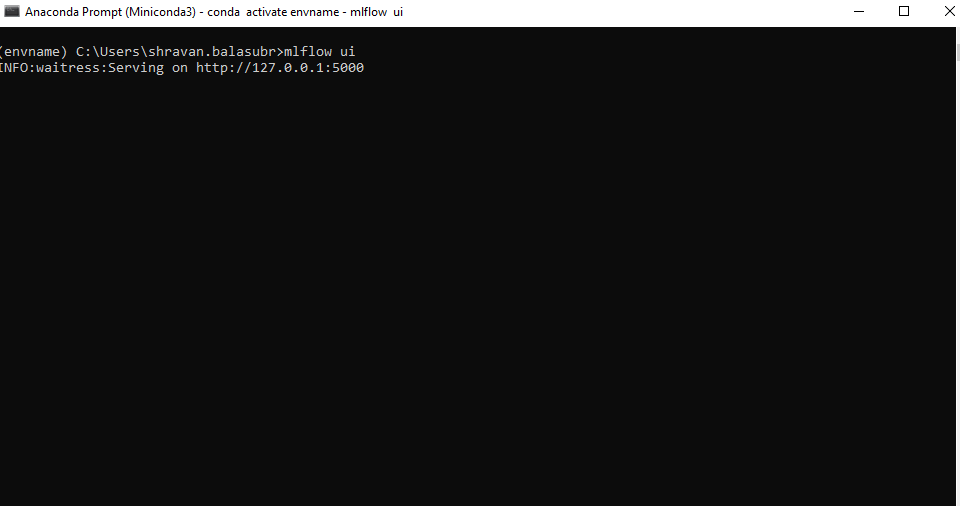


Mlflow Ui that shows the 2 experiements that have been coded above

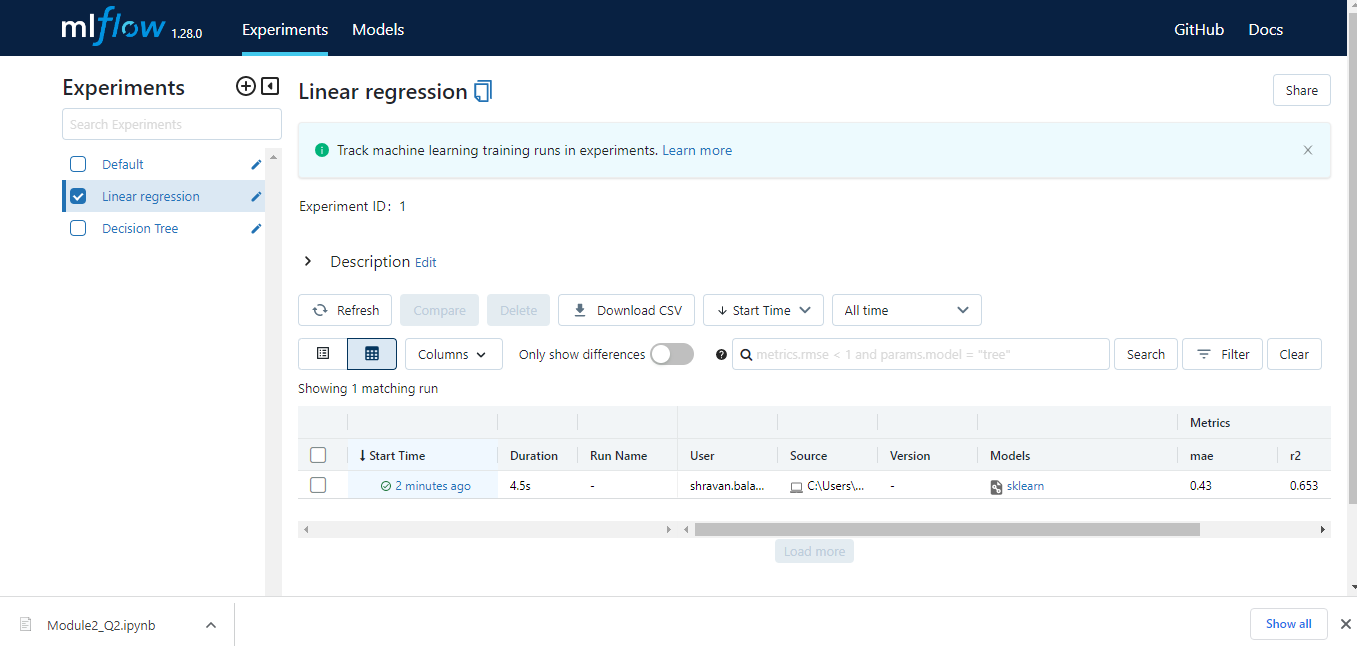

Metrics tracked for linear regression experiment

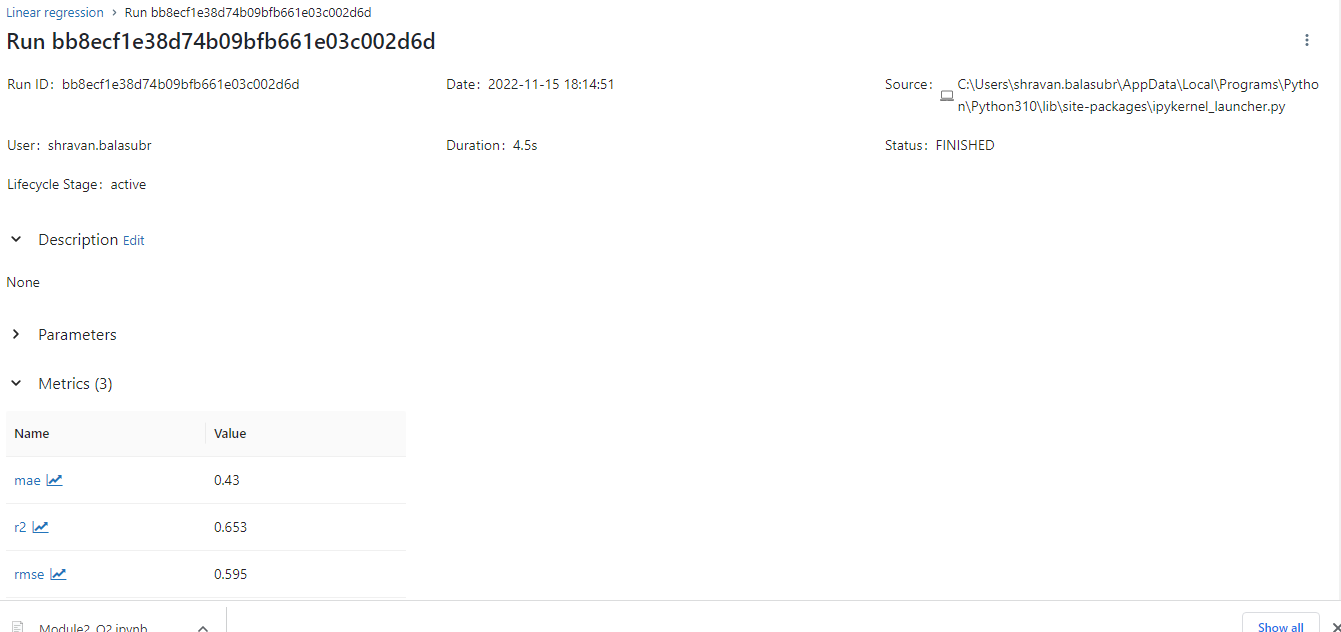

Module 2, q2, part 2 :

create a main script that runs everything together under a single parent mlflow run-id. Each of the child tasks (i.e. data preparation, model training etc) should get their own mlflow run-id but run as child runs of the main run. See the documentation of the start_run function to see how to create nested runs. Create a PR with your changes and submit it.


In [6]:
 def eval_metrics(actual, pred):
                rmse = np.sqrt(mean_squared_error(actual, pred))
                mae = mean_absolute_error(actual, pred)
                r2 = r2_score(actual, pred)
                return rmse, mae, r2


def load_data(data_path):
        data = pd.read_csv(data_path)

        # Split the data into training and test sets. (0.75, 0.25) split.
        train, test = train_test_split(data)

        # The predicted column is "quality" which is a scalar from [3, 9]
        train_x = train.drop(["median_house_value"], axis=1)
        test_x = test.drop(["median_house_value"], axis=1)
        train_y = train[["median_house_value"]]
        test_y = test[["median_house_value"]]
        return train_x, train_y, test_x, test_y

In [9]:
import mlflow

# Create nested runs
experiment_id = mlflow.create_experiment("experiment13")
mlflow.end_run()
with mlflow.start_run(
    run_name="PARENT_RUN",
    experiment_id=experiment_id,
    tags={"version": "v1", "priority": "P1"},
    description="parent",
) as parent_run:
    mlflow.log_param("parent", "yes")
    with mlflow.start_run(
        run_name="CHILD_RUN_1",
        experiment_id=experiment_id,
        description="child",
        nested=True,
        
        ) as child_run:
        
            dh = pd.read_csv("housing.csv")
    
            dh["rooms_per_household"] = dh["total_rooms"]/dh["households"]
            dh["bedrooms_per_room"] = dh["total_bedrooms"]/dh["total_rooms"]
            dh["population_per_household"]=dh["population"]/dh["households"]
    
    
            dh["total_bedrooms"].fillna(dh["total_bedrooms"].median(), inplace=True)
            dh["bedrooms_per_room"].fillna(dh["bedrooms_per_room"].median(), inplace=True)
    
            dh_num = dh.select_dtypes(include=[np.number])
            dh_char = dh.select_dtypes(include=[np.object])

            from sklearn.preprocessing import StandardScaler

            ss=StandardScaler()
            dh_num_scale = pd.DataFrame(ss.fit_transform(dh_num),columns=dh_num.columns)
            dh_char_dum = pd.get_dummies(data=dh_char, drop_first=True)
            dh_num_scale=dh_num_scale.reset_index(drop=True)
            dh_char_dum = dh_char_dum.reset_index(drop=True)
            dh_clean = pd.concat([dh_num_scale,dh_char_dum],axis=1)
            dh_clean.to_csv('housing_cleaned_final.csv')
    
            mlflow.log_param("child", "yes")
        
    with mlflow.start_run(
        run_name="CHILD_RUN_2",
        experiment_id=experiment_id,
        description="child",
        nested=True,
    ) as child_run:
        mlflow.log_param("child", "yes")
        
            #modelling and evaluation
           
    
        warnings.filterwarnings("ignore")
        np.random.seed(40)
        data_path = "housing_cleaned_final.csv"
        train_x, train_y, test_x, test_y = load_data(data_path)
        mlflow.log_param("Data Split",'yes')
        lr = LinearRegression()
        lr.fit(train_x, train_y)


        # Evaluate Metrics
        predicted_qualities = lr.predict(test_x)
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)


        # Print out metrics
        print("Linear Regression  model:")
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_metric(key="rmse", value=rmse)
        mlflow.log_metrics({"mae": mae, "r2": r2})
        mlflow.log_artifact(data_path)
        print("Save to: {}".format(mlflow.get_artifact_uri()))
        mlflow.sklearn.log_model(lr, "model")
        mlflow.log_param("Modelling", "yes")

print("parent run:")

print("run_id: {}".format(parent_run.info.run_id))
print("description: {}".format(parent_run.data.tags.get("mlflow.note.content")))
print("version tag value: {}".format(parent_run.data.tags.get("version")))
print("priority tag value: {}".format(parent_run.data.tags.get("priority")))
print("--")

# Search all child runs with a parent id
query = "tags.mlflow.parentRunId = '{}'".format(parent_run.info.run_id)
results = mlflow.search_runs(experiment_ids=[experiment_id], filter_string=query)
print("child runs:")
print(results[["run_id", "params.child", "tags.mlflow.runName"]])

Linear Regression  model:
  RMSE: 0.5953237025985277
  MAE: 0.42987954139046086
  R2: 0.6529459027404896
Save to: file:///C:/Users/shravan.balasubr/mlruns/18/c241a3a1d0cc4558a0648b818eeda250/artifacts
parent run:
run_id: 75f89f78c9d34e3888002b4831b8d259
description: parent
version tag value: v1
priority tag value: P1
--
child runs:
                             run_id params.child tags.mlflow.runName
0  c241a3a1d0cc4558a0648b818eeda250          yes         CHILD_RUN_2
1  ea30dc3a40c34e94898f7a55260a3215          yes         CHILD_RUN_1


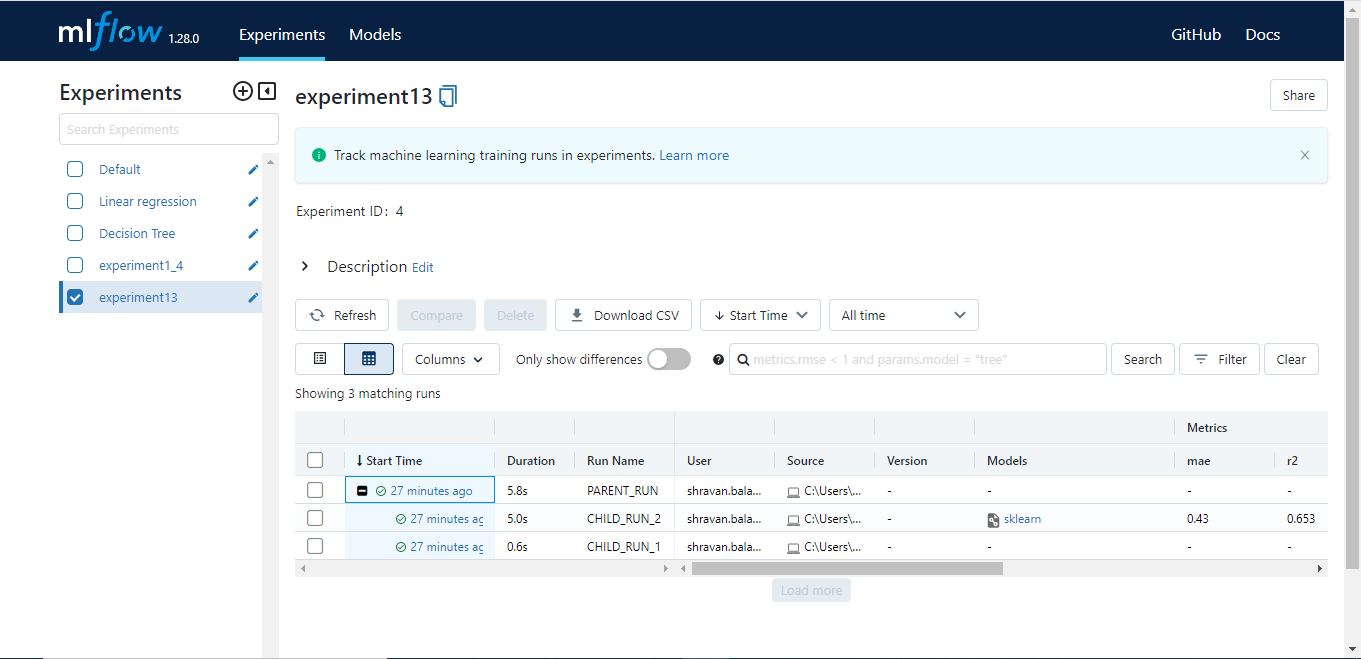